In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6T7RZV/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6T7RZV/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6T7RZV/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
BUFFER_SIZE=10000
BATCH_SIZE=256

train_data, test_data = dataset['train'], dataset['test']

train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)


In [ ]:
import tensorflow as tf
import numpy as np

kernel_size=5
filters=128
features=20
timesteps=20
batch_size=1

random_input = np.random.rand(batch_size, timesteps, features)
print(f'initial: {random_input.shape}')

conv1d = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')

result = conv1d(random_input)
print(f'after conv: {result.shape}')

maxpool = tf.keras.layers.GlobalMaxPooling1D()
result = maxpool(result)
print(f'after maxpool: {result.shape}')

initial: (1, 20, 20)
after conv: (1, 16, 128)
after maxpool: (1, 128)


In [ ]:
import tensorflow as tf

embedding_dim=64
dense_dim=64
filters=128
kernel_size=5


model = tf.keras.models.Sequential([
         tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
         tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size),
         tf.keras.layers.GlobalMaxPooling1D(),
         tf.keras.layers.Dense(dense_dim, activation='relu'),
         tf.keras.layers.Dense(1, activation='sigmoid')                           
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS=10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 268s 3s/step - loss: 0.6120 - accuracy: 0.6692 - val_loss: 0.4070 - val_accuracy: 0.8260
Epoch 2/10
98/98 [==============================] - 264s 3s/step - loss: 0.2893 - accuracy: 0.8810 - val_loss: 0.2676 - val_accuracy: 0.8886
Epoch 3/10
98/98 [==============================] - 270s 3s/step - loss: 0.1530 - accuracy: 0.9474 - val_loss: 0.2629 - val_accuracy: 0.8942
Epoch 4/10
98/98 [==============================] - 272s 3s/step - loss: 0.0701 - accuracy: 0.9831 - val_loss: 0.3056 - val_accuracy: 0.8888
Epoch 5/10
98/98 [==============================] - 270s 3s/step - loss: 0.0243 - accuracy: 0.9969 - val_loss: 0.3288 - val_accuracy: 0.8917
Epoch 6/10
98/98 [==============================] - 271s 3s/step - loss: 0.0079 - accuracy: 0.9998 - val_loss: 0.3561 - val_accuracy: 0.8918
Epoch 7/10
98/98 [==============================] - 272s 3s/step - loss: 0.0037 - accuracy: 0.9999 - val_loss: 0.3764 - val_accuracy: 0.8919
Epoch 8/10
98

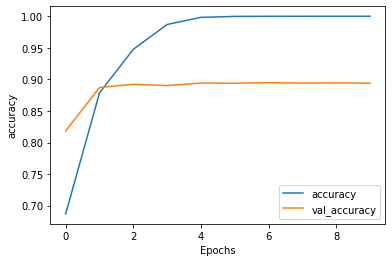

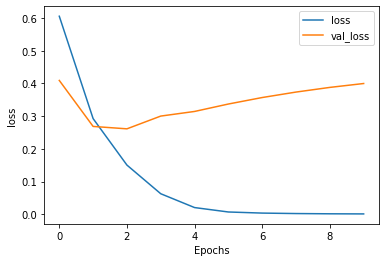

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")